In [1]:
import numpy as np
from sklearn.feature_extraction import image

one_image = np.arange(4 * 4 * 3).reshape((4, 4, 3))
one_image[:, :, 0]  # R channel of a fake RGB picture
patches = image.extract_patches_2d(one_image, (2, 2), max_patches=2,
    random_state=0)
patches.shape
patches[:, :, :, 0]
patches = image.extract_patches_2d(one_image, (2, 2))
patches.shape
patches[4, :, :, 0]

array([[15, 18],
       [27, 30]])

In [2]:
reconstructed = image.reconstruct_from_patches_2d(patches, (4, 4, 3))
np.testing.assert_array_equal(one_image, reconstructed)

In [3]:
five_images = np.arange(5 * 4 * 4 * 3).reshape(5, 4, 4, 3)
patches = image.PatchExtractor((2, 2)).transform(five_images)
patches.shape

(45, 2, 2, 3)

Automatically created module for IPython interactive environment
Compute structured hierarchical clustering...
Elapsed time:  0.1999983787536621
Number of pixels:  4697
Number of clusters:  27


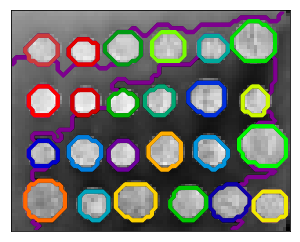

In [5]:
%matplotlib inline
# Author : Vincent Michel, 2010
#          Alexandre Gramfort, 2011
# License: BSD 3 clause

print(__doc__)

import time as time

import numpy as np
from scipy.ndimage.filters import gaussian_filter

import matplotlib.pyplot as plt

from skimage.data import coins
from skimage.transform import rescale

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering


# #############################################################################
# Generate data
orig_coins = coins()

# Resize it to 20% of the original size to speed up the processing
# Applying a Gaussian filter for smoothing prior to down-scaling
# reduces aliasing artifacts.
smoothened_coins = gaussian_filter(orig_coins, sigma=2)
rescaled_coins = rescale(smoothened_coins, 0.2, mode="reflect")

X = np.reshape(rescaled_coins, (-1, 1))

# #############################################################################
# Define the structure A of the data. Pixels connected to their neighbors.
connectivity = grid_to_graph(*rescaled_coins.shape)

# #############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 27  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',
                               connectivity=connectivity)
ward.fit(X)
label = np.reshape(ward.labels_, rescaled_coins.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

# #############################################################################
# Plot the results on an image
plt.figure(figsize=(5, 5))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l,
                colors=[plt.cm.nipy_spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()